In [41]:
import cv2
import os
from ultralytics import YOLO
import easyocr
import matplotlib.pyplot as plt

In [42]:
# Paths
image_dir = "datasets/train/images"
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(f"{output_dir}/crops", exist_ok=True)

In [43]:
# Load models
model = YOLO("runs\detect/train7/weights/best.pt")
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [44]:
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]


image 1/1 c:\Users\tom_t\OneDrive\Documents\GitHub\postnord_reader\datasets\train\images\2bd22522-shared_image.jpeg: 384x640 3 OCR_AREAs, 271.9ms
Speed: 2.0ms preprocess, 271.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


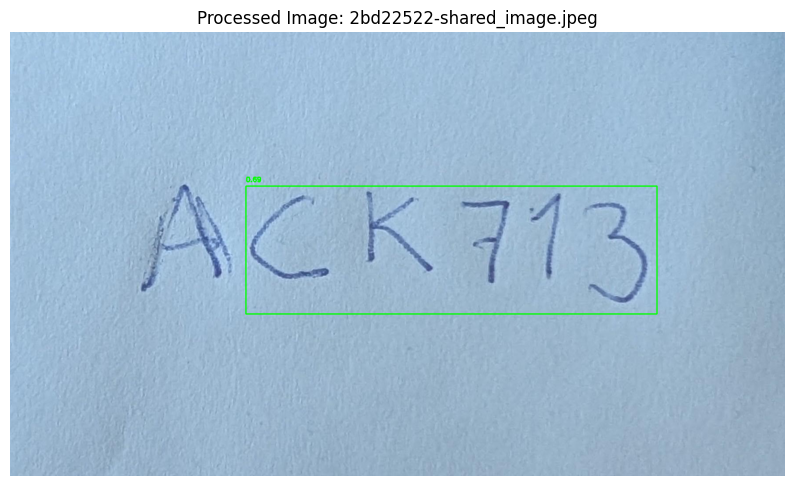


image 1/1 c:\Users\tom_t\OneDrive\Documents\GitHub\postnord_reader\datasets\train\images\3cdb48a5-20250224-101020-971_RT.jpg: 512x640 3 OCR_AREAs, 285.5ms
Speed: 1.9ms preprocess, 285.5ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


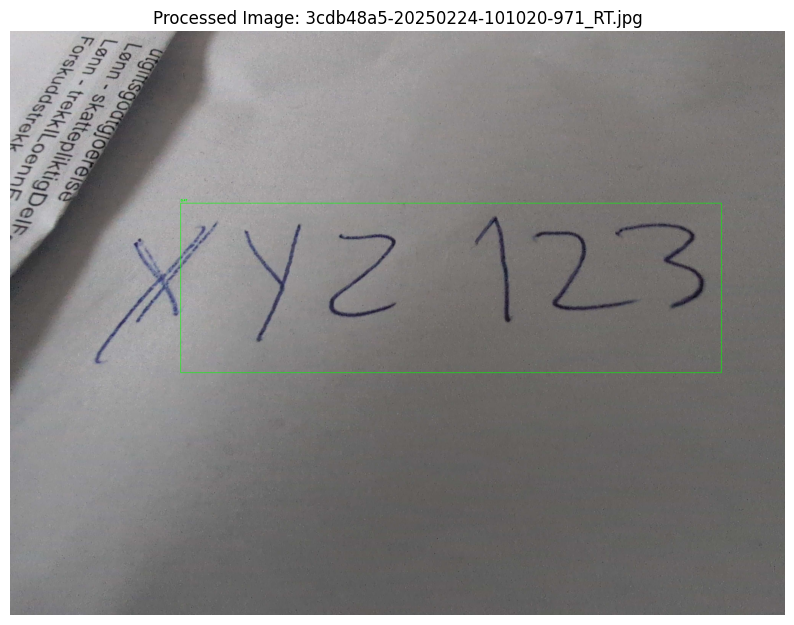


image 1/1 c:\Users\tom_t\OneDrive\Documents\GitHub\postnord_reader\datasets\train\images\517afebd-Image_4.jpeg: 640x480 3 OCR_AREAs, 433.4ms
Speed: 2.0ms preprocess, 433.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


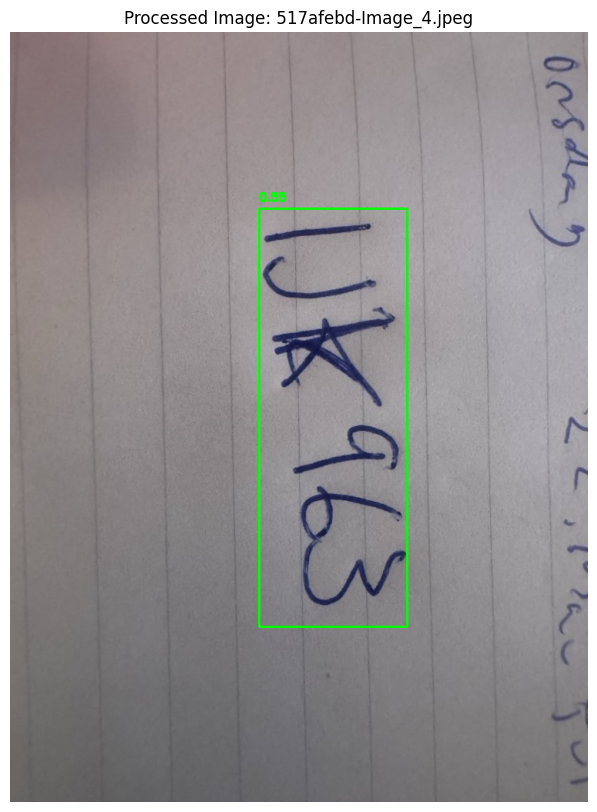


image 1/1 c:\Users\tom_t\OneDrive\Documents\GitHub\postnord_reader\datasets\train\images\53b49d85-Image_6.jpeg: 640x480 1 OCR_AREA, 446.9ms
Speed: 2.7ms preprocess, 446.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


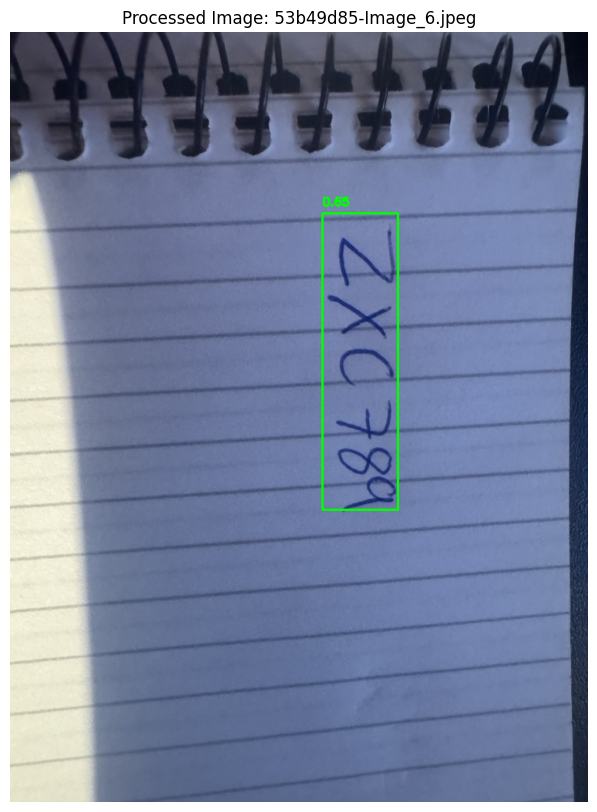


image 1/1 c:\Users\tom_t\OneDrive\Documents\GitHub\postnord_reader\datasets\train\images\7ce53ac6-Image_5.jpeg: 640x480 2 OCR_AREAs, 492.6ms
Speed: 2.5ms preprocess, 492.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


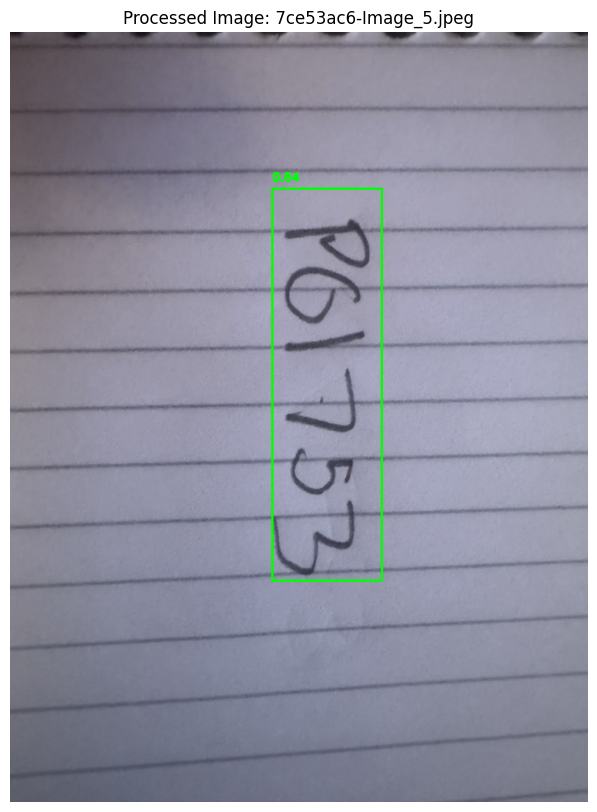


image 1/1 c:\Users\tom_t\OneDrive\Documents\GitHub\postnord_reader\datasets\train\images\87fd2d3b-Image_8.jpeg: 640x480 1 OCR_AREA, 449.2ms
Speed: 2.4ms preprocess, 449.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


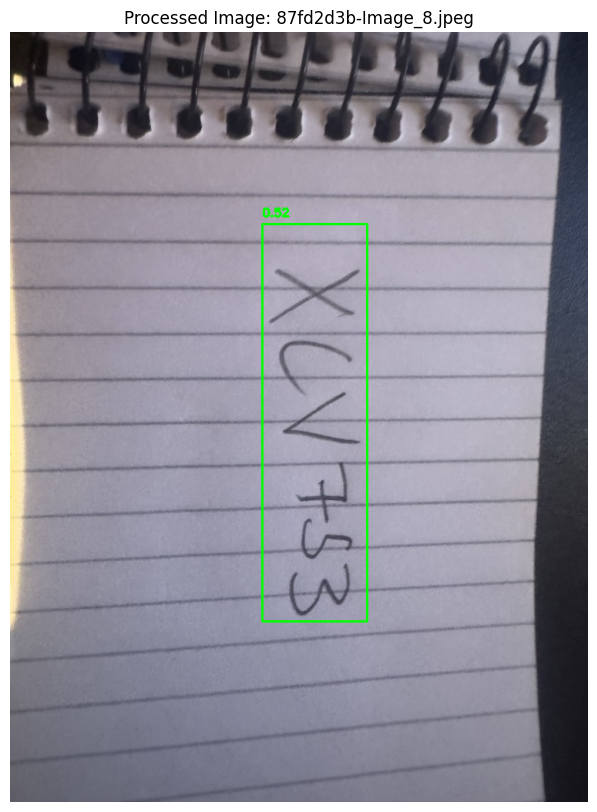


image 1/1 c:\Users\tom_t\OneDrive\Documents\GitHub\postnord_reader\datasets\train\images\aba9a28b-Image_2.jpeg: 640x480 (no detections), 490.7ms
Speed: 3.7ms preprocess, 490.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)
No bounding boxes detected for image: aba9a28b-Image_2.jpeg

image 1/1 c:\Users\tom_t\OneDrive\Documents\GitHub\postnord_reader\datasets\train\images\b49d60b1-Image.jpeg: 416x640 1 OCR_AREA, 508.6ms
Speed: 1.9ms preprocess, 508.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


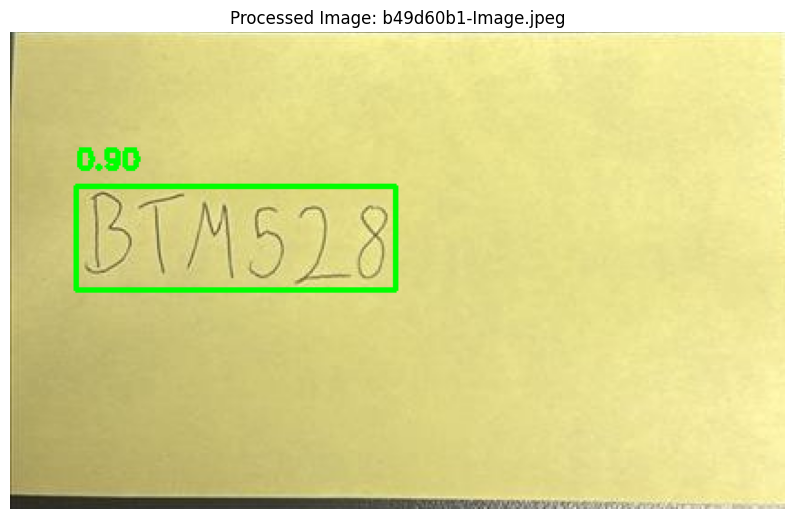


image 1/1 c:\Users\tom_t\OneDrive\Documents\GitHub\postnord_reader\datasets\train\images\synthetic_0.jpg: 480x640 1 OCR_AREA, 560.9ms
Speed: 1.9ms preprocess, 560.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


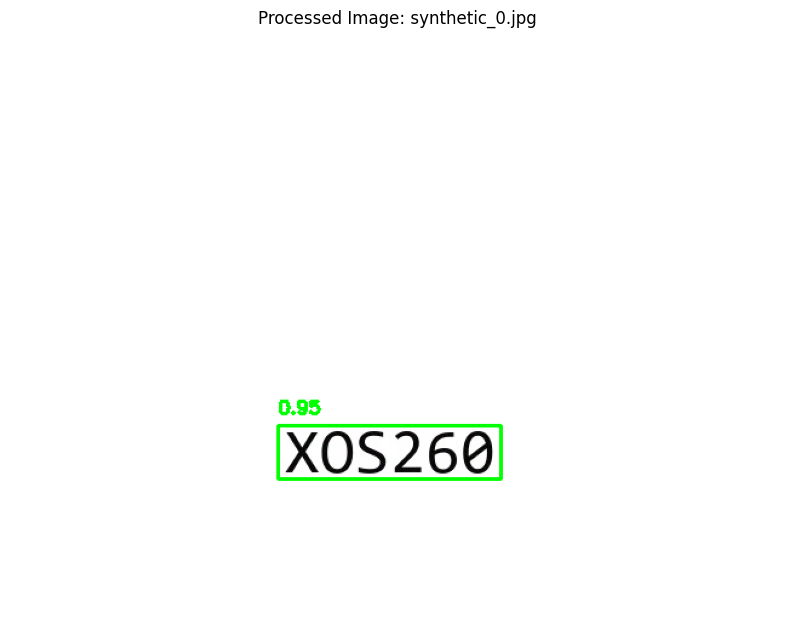


image 1/1 c:\Users\tom_t\OneDrive\Documents\GitHub\postnord_reader\datasets\train\images\synthetic_1.jpg: 480x640 1 OCR_AREA, 669.8ms
Speed: 1.9ms preprocess, 669.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


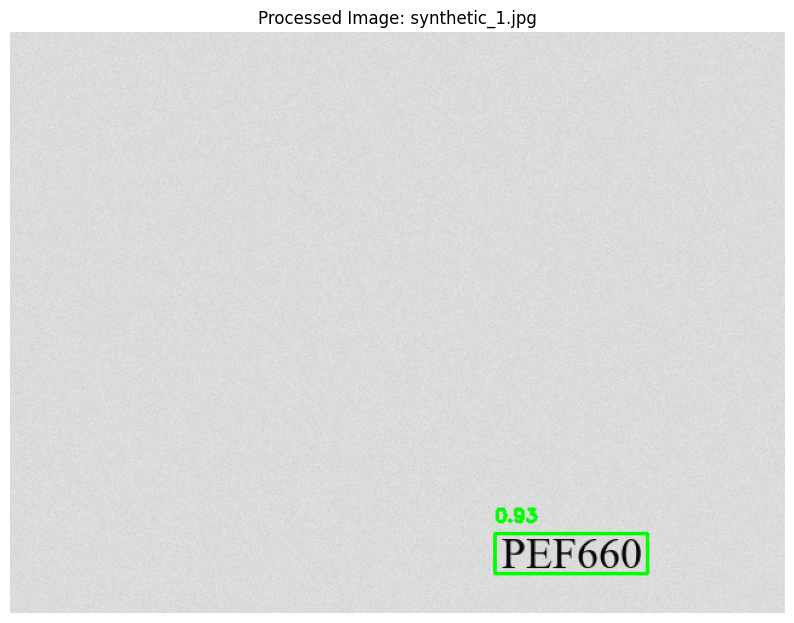

In [52]:
# Test with 5 images from the image_dir
for img_file in image_files[:10]:
    img_path = os.path.join(image_dir, img_file)
    results = model(img_path)  # Run the YOLO model on the image
    result = results[0]  # Get the first result

    # Extract the best bounding box
    if result.boxes.conf.numel() > 0:  # Check if there are any bounding boxes
        best_conf_idx = result.boxes.conf.argmax()
        best_box = result.boxes.xyxy[best_conf_idx]

        # Draw the best box on the image
        x1, y1, x2, y2 = map(int, best_box[:4])
        cv2.rectangle(result.orig_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(result.orig_img, f'{result.boxes.conf[best_conf_idx]:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Processed Image: {img_file}")
        plt.show()
    else:
        print(f"No bounding boxes detected for image: {img_file}")